In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('ParisHousing.csv')

df.shape

(10000, 17)

In [2]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

<Axes: >

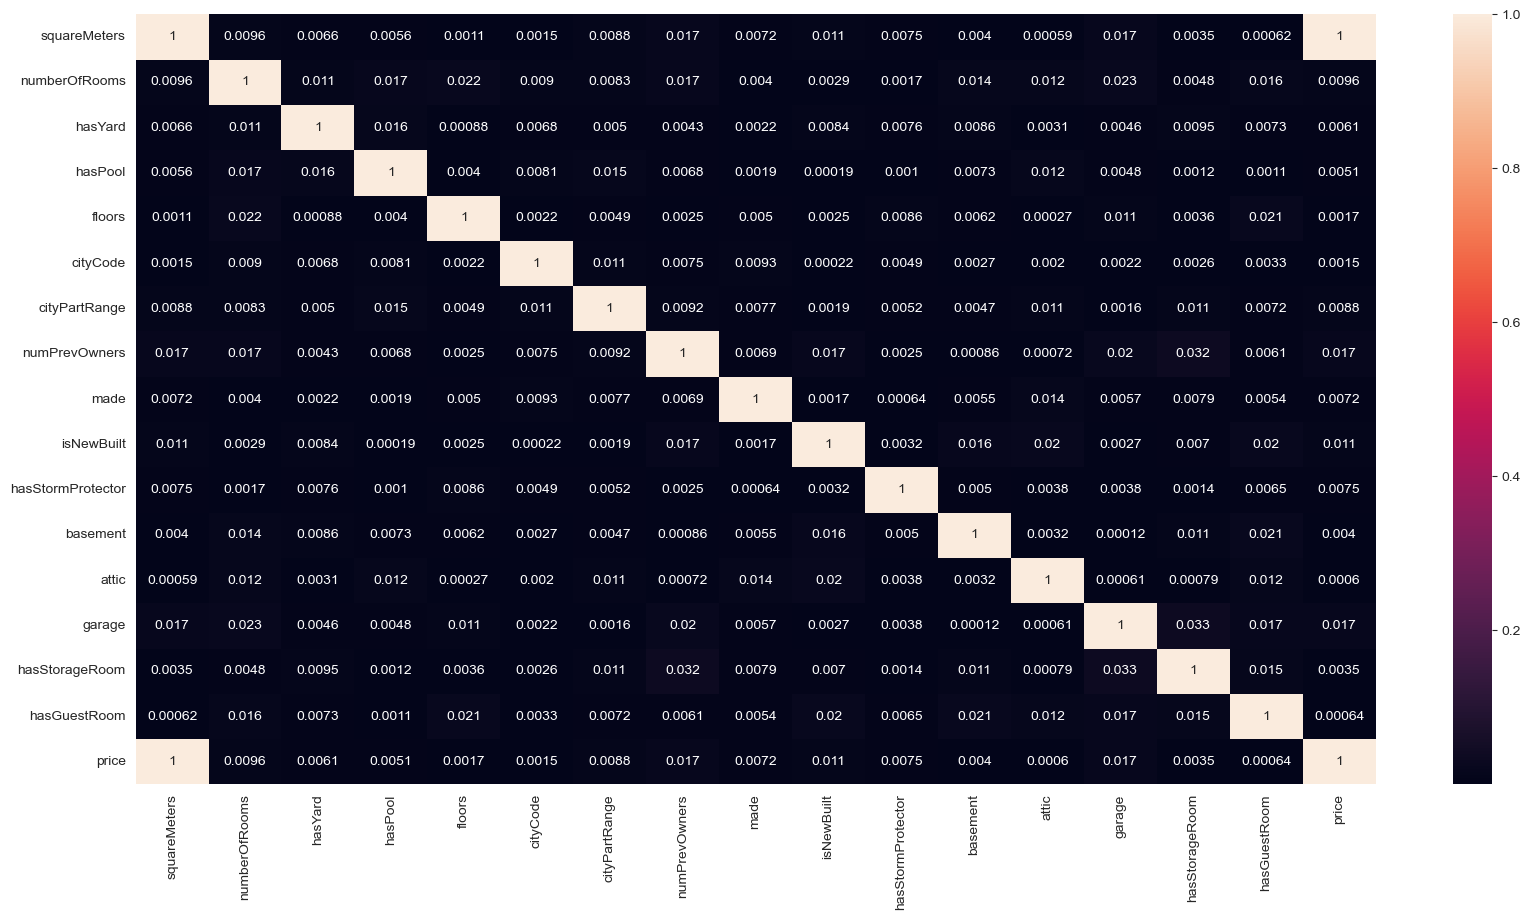

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [10]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dataset = loadtxt('ParisHousing.csv', delimiter=',', skiprows=1)
# split into input (X) and output (y) variables
X = dataset[:, 0:16]
y = dataset[:, 16]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# define the keras model
model = Sequential()
model.add(Dense(32, input_shape=(16,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Обучение
history = model.fit(X_train, y_train, epochs=48, batch_size=10, verbose=1, validation_split=0.2)
mae_per_epoch = history.history['mae']

mae_tuple = tuple(mae_per_epoch)

# Находим минимальное MAE и его эпоху
min_mae = min(mae_tuple)
min_epoch = mae_tuple.index(min_mae) + 1

print("Минимальный MAE:", min_mae)
print("Эпоха с минимальным MAE:", min_epoch)
# evaluate the keras model
_, mae = model.evaluate(X_test, y_test)
print(f"MAE на тесте: {mae:.2f}")

Epoch 1/48


/opt/miniconda3/envs/ML/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - loss: 32655479406592.0000 - mae: 4950560.5000 - val_loss: 33345188659200.0000 - val_mae: 5017081.5000
Epoch 2/48
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 32623816605696.0000 - mae: 4948348.0000 - val_loss: 33280455868416.0000 - val_mae: 5012573.5000
Epoch 3/48
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 32518520700928.0000 - mae: 4940988.0000 - val_loss: 33125348409344.0000 - val_mae: 5001778.5000
Epoch 4/48
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 32314950156288.0000 - mae: 4926693.0000 - val_loss: 32863223283712.0000 - val_mae: 4983481.0000
Epoch 5/48
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 32002837315584.0000 - mae: 4904733.0000 - val_loss: 32484301471744.0000 - val_mae: 4956907.0000
Epoch 6/48
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 31570538790912.0000 - mae: 4874118.0000 - val_loss: 31980806733824.0000 - val_mae: 4921361.0000
Epoch 7/48
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 3

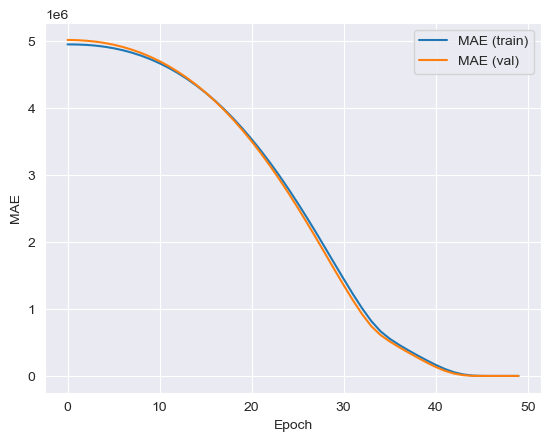

In [7]:
plt.plot(history.history['mae'], label='MAE (train)')
plt.plot(history.history['val_mae'], label='MAE (val)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_norm)

print("Исходное количество признаков:", X.shape[1])
print("После PCA:", X_pca.shape[1])

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Модель
model_pca = Sequential()
model_pca.add(Dense(32, input_shape=(X_pca.shape[1],), activation='relu'))
model_pca.add(Dense(16, activation='relu'))
model_pca.add(Dense(1))

model_pca.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Обучение
history_pca = model_pca.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2, verbose=1)

# MAE
mae_tuple_pca = tuple(history_pca.history['mae'])
min_mae_pca = min(mae_tuple_pca)
min_epoch_pca = mae_tuple_pca.index(min_mae_pca) + 1

print("Минимальный MAE с PCA:", min_mae_pca)
print("Эпоха с минимальным MAE с PCA:", min_epoch_pca)

_, mae_pca = model_pca.evaluate(X_test, y_test)
print(f"MAE на тесте с PCA: {mae_pca:.2f}")

print(pca.n_components_)

Исходное количество признаков: 16
После PCA: 16
Epoch 1/150


/opt/miniconda3/envs/ML/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - loss: 32655122890752.0000 - mae: 4950520.5000 - val_loss: 33344320438272.0000 - val_mae: 5016975.0000
Epoch 2/150
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 32622421999616.0000 - mae: 4948196.0000 - val_loss: 33278526488576.0000 - val_mae: 5012439.0000
Epoch 3/150
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 32514429157376.0000 - mae: 4940810.5000 - val_loss: 33119004524544.0000 - val_mae: 5001704.5000
Epoch 4/150
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 32304919478272.0000 - mae: 4926706.5000 - val_loss: 32848272687104.0000 - val_mae: 4983593.5000
Epoch 5/150
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 31982968897536.0000 - mae: 4905042.0000 - val_loss: 32458774937600.0000 - val_mae: 4957513.0000
Epoch 6/150
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 31540025229312.0000 - mae: 4875153.5000 - val_loss: 31942340771840.0000 - val_mae: 4922762.5000
Epoch 7/150
640/640 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - l

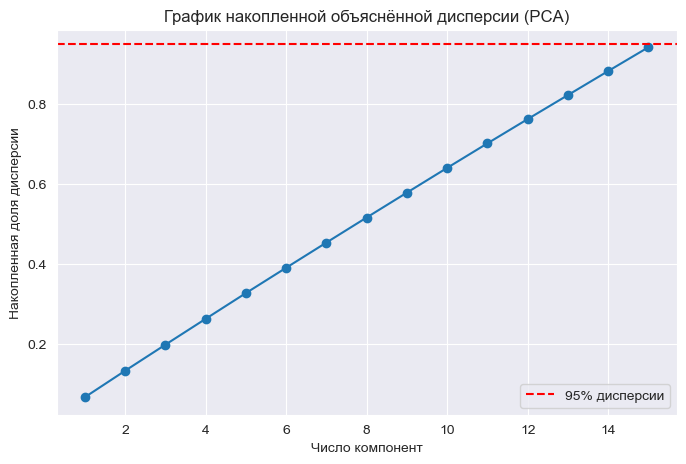

In [9]:
import matplotlib.pyplot as plt
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.xlabel('Число компонент')
plt.ylabel('Накопленная доля дисперсии')
plt.title('График накопленной объяснённой дисперсии (PCA)')
plt.grid(True)
plt.legend()
plt.show()